In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [47]:
col_names =['Name','Landmass','Zone','Area','Population','Language','Religion','Bars','Stripes','Colours','Red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
feature_names =['Landmass','Zone','Area','Population','Language','Religion','Bars','Stripes','Colours','Red','green','blue','gold','white','black','orange','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text']
df = pd.read_csv("data/flag.data", header=None, names=col_names)

print(len(col_names))

print(df.head())

30
             Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   Stripes  Colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright 

In [48]:
X = df.drop(["Name","mainhue","topleft","botright"], axis='columns')
y = df.Zone
print(X.shape)
print(y.shape)

(194, 26)
(194,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.87, 
                                                    random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25, 26)
(25,)
(169, 26)
(169,)


In [50]:
tree = DecisionTreeClassifier(max_depth=8)

tree = tree.fit(X_train, y_train)
print(tree.get_depth())

3


In [51]:
y_hat = tree.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.8816568047337278


In [52]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)

CM [[73  0  0  0]
 [ 0 10 18  0]
 [ 0  2 13  0]
 [ 0  0  0 53]]


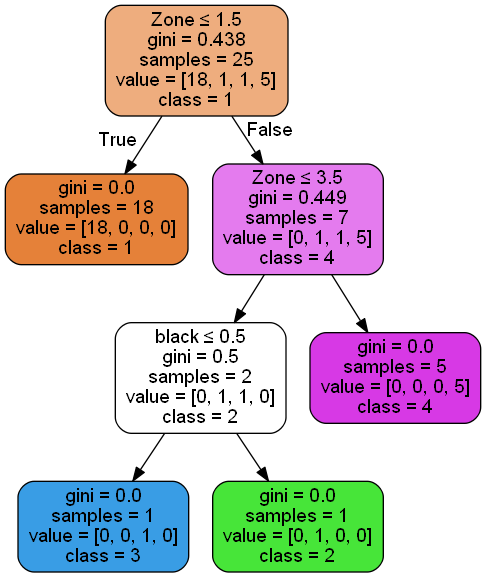

In [54]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/flags.png')
Image(graph.create_png())